In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
current_dir = os.getcwd()
#file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2284 non-null   float64
 1   output_rate                         2284 non-null   float64
 2   firewall_instructions               2284 non-null   float64
 3   nf_router_instructions              2284 non-null   float64
 4   ndpi_stats_instructions             2284 non-null   float64
 5   payload_scan_instructions           2284 non-null   float64
 6   bridge_instructions                 2284 non-null   float64
 7   firewall_branches                   2284 non-null   float64
 8   nf_router_branches                  2284 non-null   float64
 9   ndpi_stats_branches                 2284 non-null   float64
 10  payload_scan_branches               2284 non-null   float64
 11  bridge_branches                     2284 non-

In [7]:
current_dir = os.getcwd()
#file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between firewall_instructions and firewall_instructions: 1.00
Correlation between firewall_instructions and firewall_branches: 1.00
Correlation between firewall_instructions and firewall_L1-dcache-loads: 1.00
Correlation between firewall_instructions and firewall_cycles: 1.00
Correlation between firewall_instructions and firewall_branch-misses: 1.00
Correlation between firewall_instructions and firewall_branch-load-misses: 1.00
Correlation between firewall_instructions and firewall_LLC-stores: 0.87
Correlation between firewall_instructions and firewall_L1-dcache-load-misses: 0.86
Correlation between firewall_instructions and firewall_cache-references: 0.85
Correlation between firewall_instructions and firewall_LLC-loads: 0.81
Correlation between firewall_instructions and ndpi_stats_cache-references: 0.60
Correlation between firewall_instructions and ndpi_stats_LLC-loads: 0.59
Correlation between firewall_instructions and ndpi_stats_LLC-stores: 0.59
Correlation between firew

C:\Users\Qiong\AppData\Local\Temp\ipykernel_26940\3638042120.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [8]:
corr = data.corr()
correlation_list = []
for i in range(61,62):
    for j in range( len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between bridge_LLC-loads and bridge_LLC-loads: 1.00
Correlation between bridge_LLC-loads and bridge_L1-dcache-load-misses: 0.99
Correlation between bridge_LLC-loads and bridge_LLC-stores: 0.99
Correlation between bridge_LLC-loads and bridge_cache-references: 0.97
Correlation between bridge_LLC-loads and payload_scan_LLC-stores: 0.92
Correlation between bridge_LLC-loads and payload_scan_L1-dcache-load-misses: 0.91
Correlation between bridge_LLC-loads and payload_scan_cache-references: 0.89
Correlation between bridge_LLC-loads and payload_scan_LLC-loads: 0.87
Correlation between bridge_LLC-loads and output_rate: 0.80
Correlation between bridge_LLC-loads and nf_router_LLC-stores: 0.80
Correlation between bridge_LLC-loads and nf_router_L1-dcache-load-misses: 0.77
Correlation between bridge_LLC-loads and nf_router_cache-references: 0.75
Correlation between bridge_LLC-loads and nf_router_LLC-loads: 0.74
Correlation between bridge_LLC-loads and firewall_LLC-loads: 0.73
Correlation

C:\Users\Qiong\AppData\Local\Temp\ipykernel_26940\239241720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


# Slomo to predict rate

In [9]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
#X = df.drop(['input_rate','output_rate', 'latency','bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)

X =  df.drop(['output_rate', 'latency','ndpi_stats_branch-load-misses','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
#X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
#model = DecisionTreeRegressor(random_state=0)
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = GradientBoostingRegressor()

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 70.40816326530613
[0.0, 83.8192419825073, 90.67055393586006, 94.46064139941691, 96.20991253644316, 97.23032069970844, 98.10495626822157, 98.25072886297376, 98.54227405247813, 98.9795918367347, 99.12536443148689]


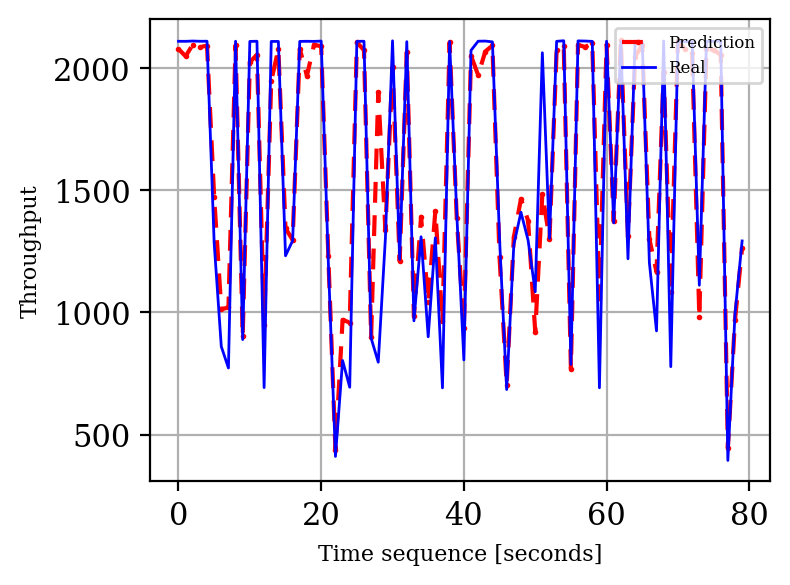

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[:80], marker='o',c='r',markersize = 1, linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test[:80].tolist(), c='b',linestyle='-',linewidth = 1,label='Real')

plt.xlabel('Time sequence [seconds]',fontsize=8)
plt.ylabel('Throughput',fontsize=8)

plt.legend(loc="upper right", fontsize=6)
plt.grid()

In [11]:
# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print("SMAPE (Symmetric Mean Absolute Percentage Error):", smape)

SMAPE (Symmetric Mean Absolute Percentage Error): 6.692112173084181


In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8733822900226305


# Dobrescu

In [14]:
current_dir = os.getcwd()
#file_path = os.path.abspath('../linear/datasets/intervention_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [15]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
columns_to_include = ['firewall_cache-references', 'nf_router_cache-references', 'ndpi_stats_cache-references', 'payload_scan_cache-references', 'bridge_cache-references']
X = df[columns_to_include]
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
#model = DecisionTreeRegressor(random_state=0)
model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = GradientBoostingRegressor()

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 64.43148688046647
[0.0, 76.23906705539358, 86.88046647230321, 90.67055393586006, 93.4402332361516, 95.48104956268222, 96.35568513119533, 96.93877551020408, 97.08454810495627, 97.37609329446065, 97.37609329446065]


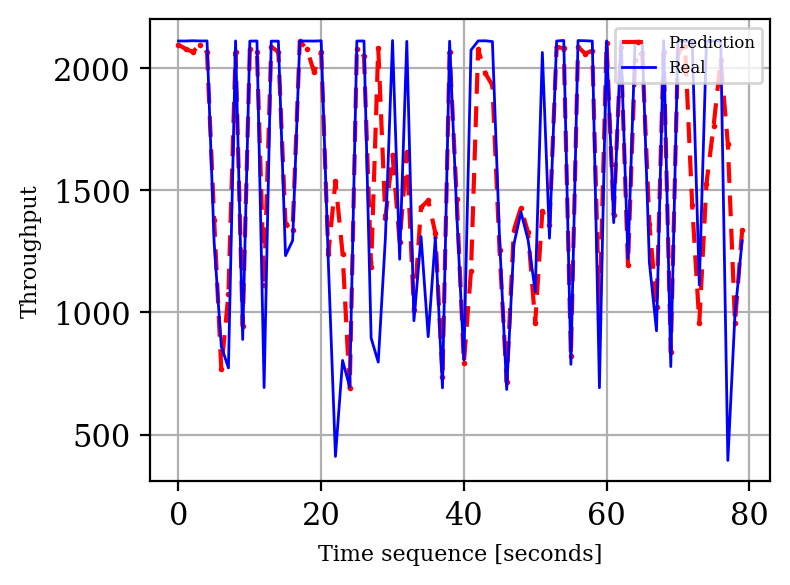

In [16]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[:80], marker='o',c='r',markersize = 1, linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test[:80].tolist(), c='b',linestyle='-',linewidth = 1,label='Real')

plt.xlabel('Time sequence [seconds]',fontsize=8)
plt.ylabel('Throughput',fontsize=8)

plt.legend(loc="upper right", fontsize=6)
plt.grid()

In [17]:
# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print("SMAPE (Symmetric Mean Absolute Percentage Error):", smape)

SMAPE (Symmetric Mean Absolute Percentage Error): 10.070817912528828


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7483865763107205


# ANN to predict rate

In [19]:
current_dir = os.getcwd()
#file_path = os.path.abspath('../linear/datasets/intervention_global_1.csv')
#file_path = os.path.abspath('../linear/datasets/load_stimulus_global_4.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [23]:
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','ndpi_stats_branch-load-misses',
            'payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
            'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses','ndpi_stats_branches','firewall_branches','payload_scan_branches','bridge_branches'], axis=1)

y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2284


In [24]:
# model
from keras import regularizers

model = Sequential()

# Add input layer and hidden layers
#model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add output layer
model.add(Dense(1))

In [25]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 1037023.5000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 217952.9688
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 133780.5781
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 120104.4609
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 113935.6016
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 110161.5000
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 107212.6484
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 103279.8281
Epoch 9/100
200/200 [==============================] - 1s 3ms/step - loss: 101929.3906
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 98994.9766
Epoch 11/100
200/200 [==============================] - 1s 3ms/step - loss: 97029.6484
Epoch 12/100
200/200 [====================

200/200 [==============================] - 1s 3ms/step - loss: 38180.7852
Epoch 96/100
200/200 [==============================] - 1s 3ms/step - loss: 39230.0234
Epoch 97/100
200/200 [==============================] - 1s 3ms/step - loss: 37500.1680
Epoch 98/100
200/200 [==============================] - 1s 3ms/step - loss: 39466.7070
Epoch 99/100
200/200 [==============================] - 1s 3ms/step - loss: 39027.2148
Epoch 100/100
200/200 [==============================] - 1s 3ms/step - loss: 38080.3477


22/22 [==============================] - 0s 2ms/step
[0.0, 81.63265306122449, 88.62973760932945, 91.98250728862973, 93.58600583090379, 95.48104956268222, 97.23032069970844, 97.52186588921283, 97.81341107871721, 97.95918367346938, 98.39650145772595]


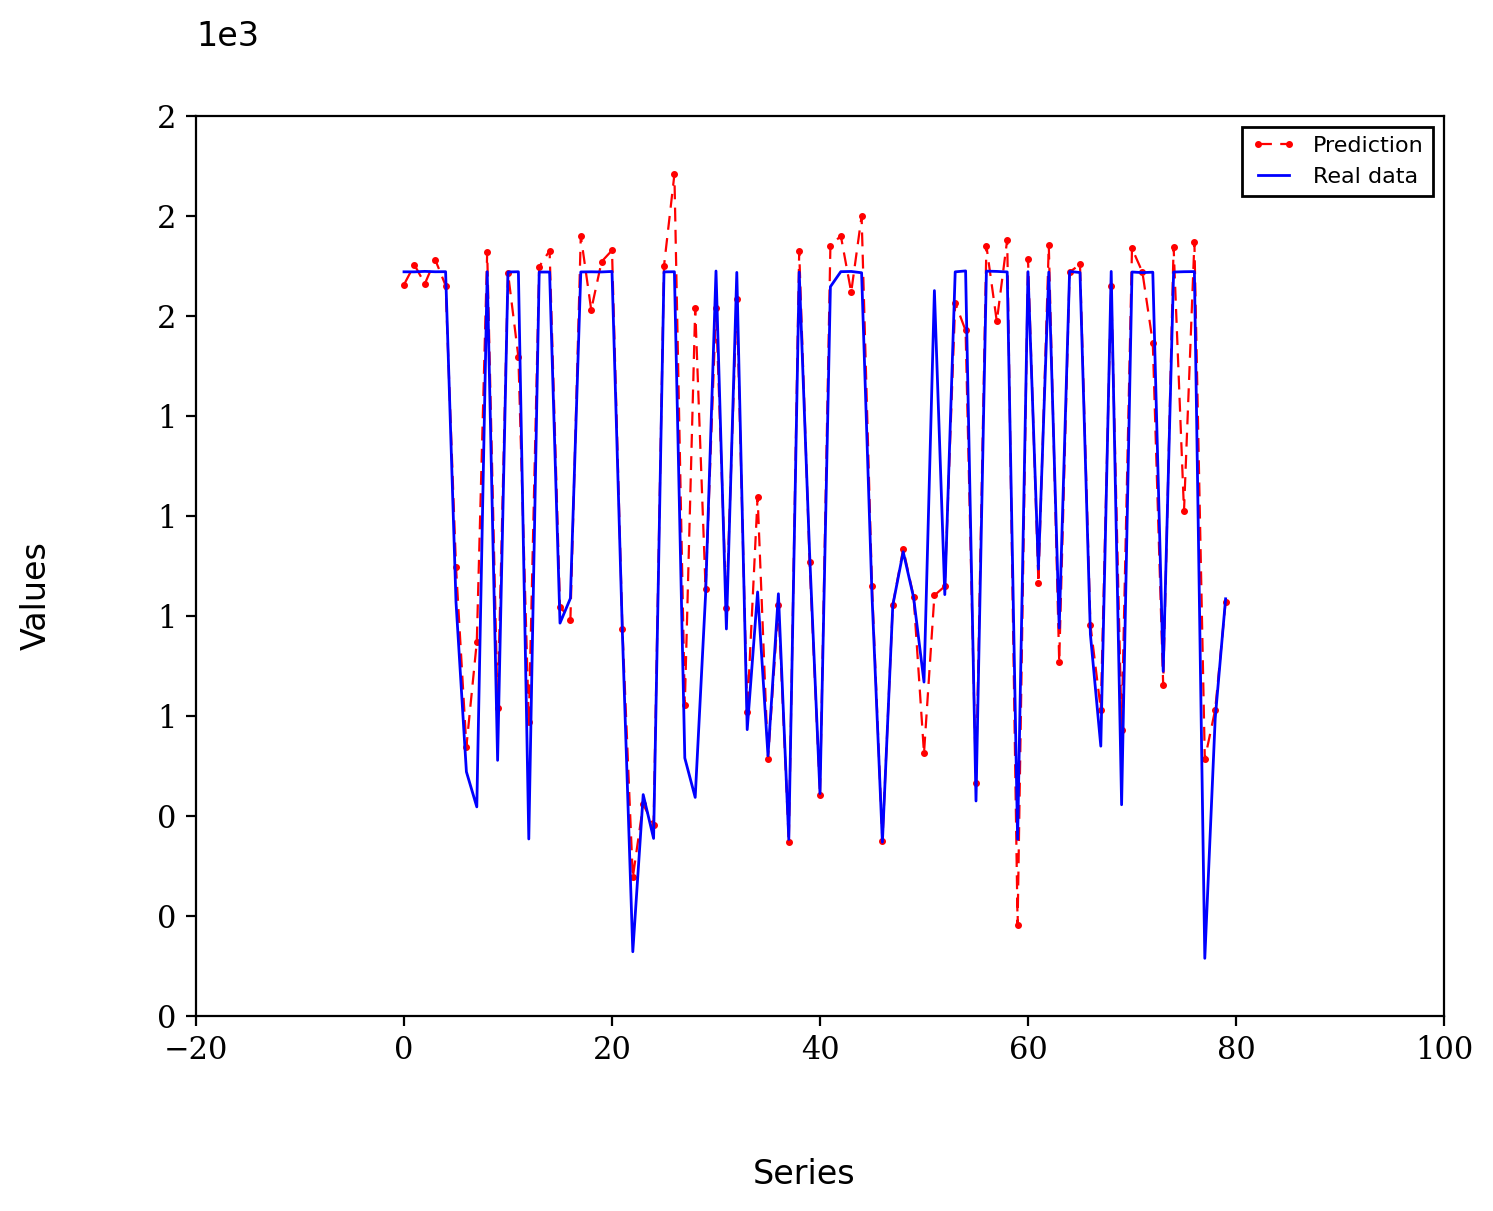

In [26]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:80], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:80], c='b',linestyle='-',linewidth = 1,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()

In [27]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8112062010440545


In [18]:
# Initialize the list to store the MAPE values
mape_values = []

# Calculate MAPE for each threshold
for threshold in range(11):
    threshold = threshold / 10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    mape = sum(dist <= threshold for dist in distances) / len(distances) * 100
    mape_values.append(mape)

print(mape_values)


[0.0, 17.341225403935372, 33.81858902575588, 46.3125899856023, 56.43896976483762, 64.26171812509999, 70.05279155335147, 75.79587266037434, 80.17917133258679, 82.78675411934091, 84.59446488561831]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_21040\3953428266.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
